# In this notebook I'm going to create some visualizations of the processed data

In [1]:
import numpy as np
import os
import pandas as pd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

os.chdir('C:\\Users\\solov\\Desktop\\sample_project\\data')

In [2]:
df1 = pd.read_csv('processed_Phoenix_departures_2019_AA.csv')
df2 = pd.read_csv('processed_Atlanta_departures_2019_AA.csv')

df3 = pd.read_csv('delayed_PHX_2019_AA.csv')
df4 = pd.read_csv('delayed_ATL_2019_AA.csv')

## Let's create some simple visualization displaying total number of flights and total delayed flights per airport

In [3]:
list_airports = ['PHX','ATL']
list_flights = [len(df1),len(df2)]
delayed_flights = [len(df3),len(df4)]

data = {
    'Airport': list_airports*2,
    'Flights': [list_flights[0],list_flights[1],delayed_flights[0],delayed_flights[1]],
    'Type': ['Total']*2 + ['Delayed']*2
}

vis1 = pd.DataFrame(data)

In [4]:
vis1

,Airport,Flights,Type
0,PHX,57270,Total
1,ATL,12766,Total
2,PHX,9762,Delayed
3,ATL,1976,Delayed


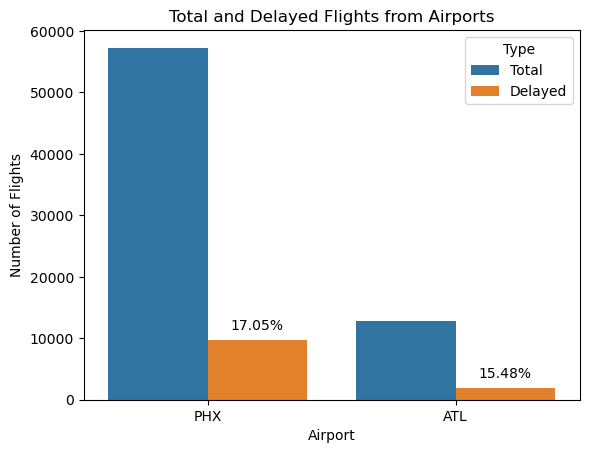

In [5]:
ax = sns.barplot(data=vis1, x='Airport', y='Flights', hue='Type', dodge=True)  

for i, p in enumerate(ax.patches):
    if i == 2:  
        percentage = (len(df3)/len(df1))*100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    if i == 3: 
        percentage = (len(df4)/len(df2))*100     
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.title('Total and Delayed Flights from Airports')

plt.show()

## Creating graphs for every month for PHX and ATL

### Phoenix:

In [6]:
df1['date_mm/dd/yyyy'] = pd.to_datetime(df1['date_mm/dd/yyyy'])

In [7]:
df1['Month'] = df1['date_mm/dd/yyyy'].dt.month
total_flights_per_month_1 = df1.groupby('Month').size()
delayed_flights_per_month_1 = df1[df1.DepDel15 == 1].groupby('Month').size()

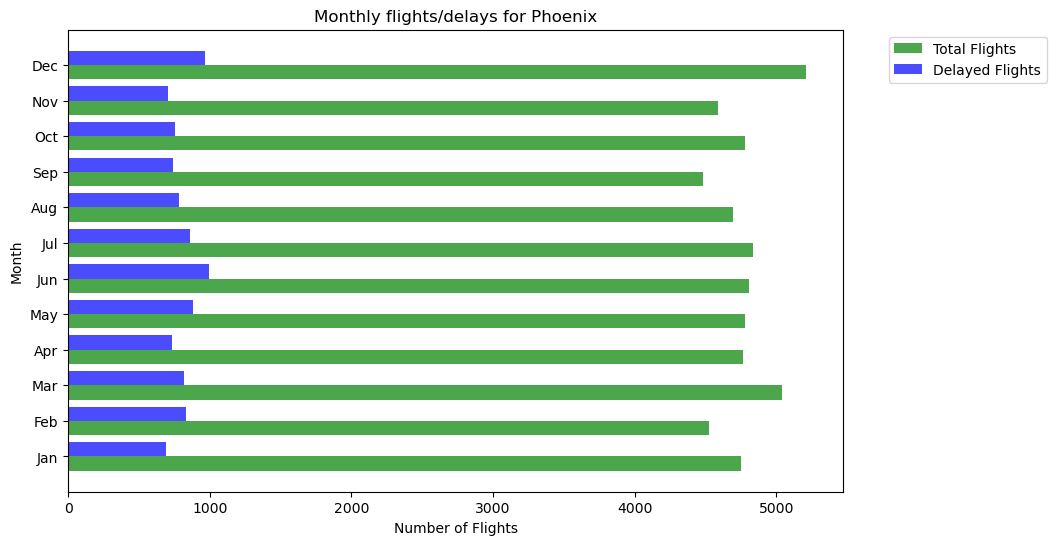

In [8]:
plt.figure(figsize=(10, 6))

plt.barh(total_flights_per_month_1.index - 0.2, total_flights_per_month_1, height=0.4, label='Total Flights', alpha=0.7, color='green')

plt.barh(delayed_flights_per_month_1.index + 0.2, delayed_flights_per_month_1, height=0.4, label='Delayed Flights', alpha=0.7, color='blue')


plt.ylabel('Month')
plt.xlabel('Number of Flights')
plt.title('Monthly flights/delays for Phoenix')
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Atlanta:

In [9]:
df2['date_mm/dd/yyyy'] = pd.to_datetime(df2['date_mm/dd/yyyy'])

In [10]:
df2['Month'] = df2['date_mm/dd/yyyy'].dt.month
total_flights_per_month_2 = df2.groupby('Month').size()
delayed_flights_per_month_2 = df2[df2.DepDel15 == 1].groupby('Month').size()

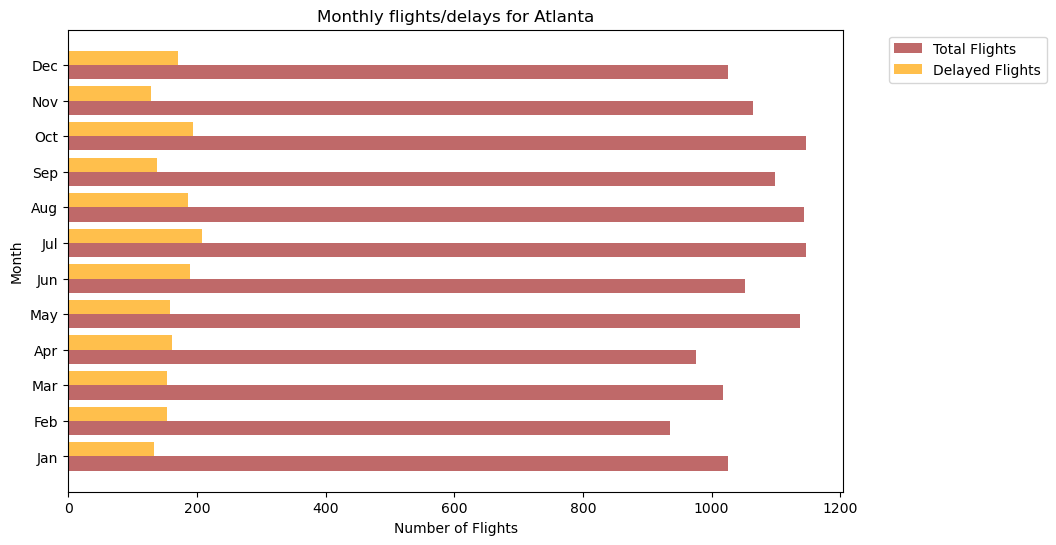

In [11]:
plt.figure(figsize=(10, 6))

plt.barh(total_flights_per_month_2.index - 0.2, total_flights_per_month_2, height=0.4, label='Total Flights', alpha=0.7, color='brown')

plt.barh(delayed_flights_per_month_2.index + 0.2, delayed_flights_per_month_2, height=0.4, label='Delayed Flights', alpha=0.7, color='orange')


plt.ylabel('Month')
plt.xlabel('Number of Flights')
plt.title('Monthly flights/delays for Atlanta')
plt.yticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Let's see the distribution of delays, meaning let's see what the most common delay is

### Phoenix:

In [12]:
mode_3 = df3['departure_delay_(minutes)'].mode().iloc[0] #only considering delayed flights now

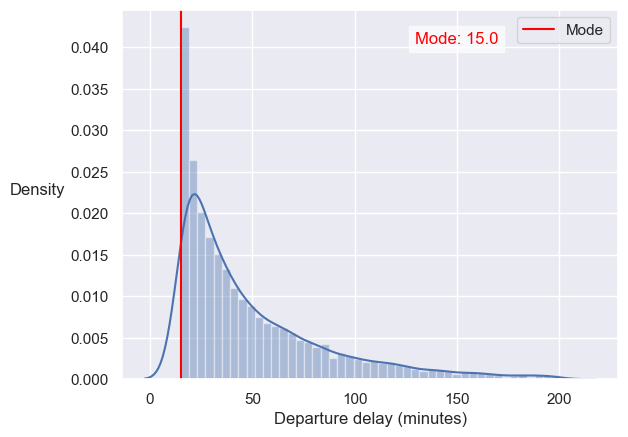

In [23]:
sns.set(style="darkgrid")

distribution_3 = sns.distplot(df3[df3['departure_delay_(minutes)']<=200]['departure_delay_(minutes)'])

text_y = distribution_3.get_ylim()[1] * 0.9

distribution_3.text(170, text_y, f'Mode: {mode_3}', verticalalignment='bottom', horizontalalignment='right',
                    color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

distribution_3.axvline(x=mode_3, color='red', linestyle='-', label='Mode')

plt.legend()
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Density',rotation='horizontal')
plt.gca().yaxis.set_label_coords(-0.17, 0.49)
plt.show()

In [14]:
df3['departure_delay_(minutes)'].mode()

0    15.0
Name: departure_delay_(minutes), dtype: float64

In [15]:
df3['departure_delay_(minutes)'].describe()

count    9762.000000
mean       59.613194
std        74.357271
min        15.000000
25%        23.000000
50%        38.000000
75%        69.000000
max      1221.000000
Name: departure_delay_(minutes), dtype: float64

### Atlanta:

In [16]:
mode_4 = df4['departure_delay_(minutes)'].mode().iloc[0]
second_mode_4 = df4['departure_delay_(minutes)'].mode().iloc[1]

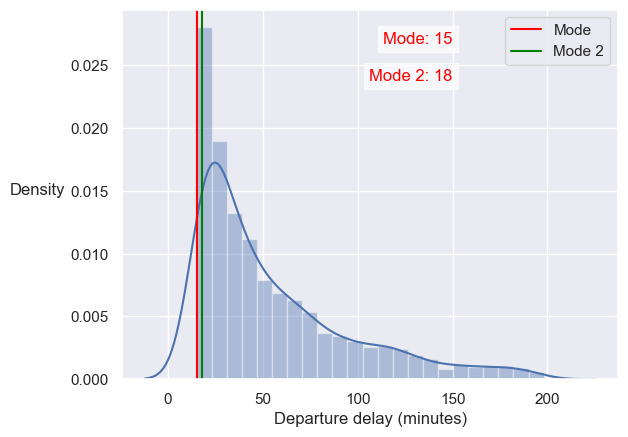

In [17]:
sns.set(style="darkgrid")
distribution_4 = sns.distplot(df4[df4['departure_delay_(minutes)']<=200]['departure_delay_(minutes)'])

text_y = distribution_4.get_ylim()[1] * 0.9
second_text_y = distribution_4.get_ylim()[1] * 0.8

distribution_4.text(150, text_y, f'Mode: {mode_4}', verticalalignment='bottom', horizontalalignment='right',
                    color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

distribution_4.text(150, second_text_y, f'Mode 2: {second_mode_4}', verticalalignment='bottom', horizontalalignment='right',
                    color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

distribution_4.axvline(x=mode_4, color='red', linestyle='-', label='Mode')
distribution_4.axvline(x=second_mode_4, color='green', linestyle='-', label='Mode 2')

plt.xlabel('Departure delay (minutes)')
ylabel = plt.ylabel('Density',rotation='horizontal',)
plt.gca().yaxis.set_label_coords(-0.17, 0.49)
plt.legend()
plt.show()

In [18]:
mode_4

15

In [19]:
second_mode_4

18

In [20]:
df4['departure_delay_(minutes)'].describe()

count    1976.000000
mean       74.982287
std       103.303634
min        15.000000
25%        24.000000
50%        44.000000
75%        85.000000
max      1435.000000
Name: departure_delay_(minutes), dtype: float64